# Графы и сети в Julia

**Граф** — математическая абстракция реальной системы любой природы, объекты которой обладают парными связями. Граф как математический объект есть совокупность двух множеств — множества самих объектов, называемого множеством вершин, и множества их парных связей, называемого множеством рёбер.

**Сеть** представляет собой множество узлов и множество связей между ними

**Graphs.jl** - основной пакет для работы с графами в Julia, **NetworkX** - в Python.

Graphs.jl предоставляет два конкретных типа графов: 
+ **SimpleGraph** — неориентированный граф, а 
+ **SimpleDiGraph** — его направленный аналог.

В настоящее время несколько других пакетов реализуют альтернативные типы графов:
+ **SimpleWeightedGraphs.jl** предоставляет структуру для (не)ориентированных графов с возможностью указания весов на ребрах.
+ **MetaGraphs.jl** предоставляет структуру для (не)ориентированных графов, которая поддерживает определяемые пользователем свойства графа, вершин и ребер.
+ **MetaGraphsNext.jl** делает то же самое, но с стабильным типом и с немного другим интерфейсом.
+ **StaticGraphs.jl** поддерживает очень большие структуры графов, экономя пространство и время, но, как следует из названия, не позволяет модифицировать уже созданный граф.

In [1]:
using Graphs, GraphPlot
using PyCall
using DataFrames, CSV
using Statistics
using Colors, Cairo, Compose

In [7]:
g = path_graph(5) # Создаем граф-путь с 6 вершинами

{5, 4} undirected simple Int64 graph

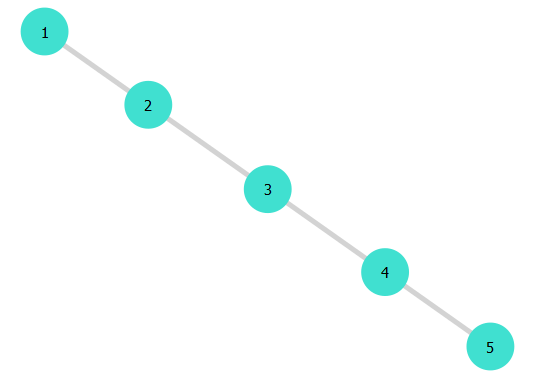

In [8]:
gplot(g, nodelabel= 1:nv(g))

## Базовые функции

In [9]:
nv(g) # число вершин

5

In [10]:
ne(g) # число ребер

4

In [12]:
Graphs.all_neighbors(g, 1) # все соседи

1-element Vector{Int64}:
 2

In [13]:
common_neighbors(g, 1, 3) # общие соседи для узлов

1-element Vector{Int64}:
 2

In [14]:
degree(g) # степень - количество ребер в каждой вершине графа

5-element Vector{Int64}:
 1
 2
 2
 2
 1

In [15]:
degree_histogram(g) # гистограмма степеней

Dict{Int64, Int64} with 2 entries:
  2 => 3
  1 => 2

In [16]:
density(g) # плотность графа

0.4

In [18]:
add_edge!(g, 5, 1) # добавить ребро между 1 и 6 вершинами

true

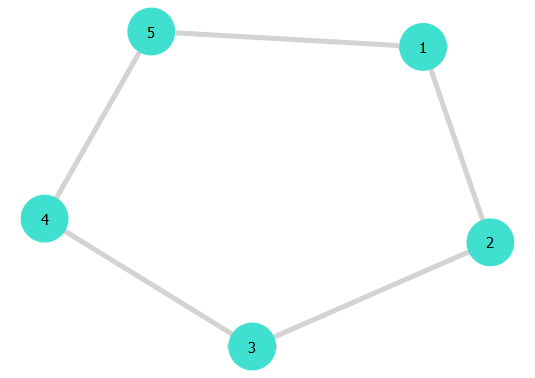

In [30]:
gplot(g, nodelabel= 1:nv(g))

In [23]:
has_self_loops(g) # имеет ли петли?

false

In [24]:
num_self_loops(g)

0

In [28]:
add_edge!(g, 3, 3)

true

In [26]:
has_self_loops(g)

true

In [29]:
num_self_loops(g)

2

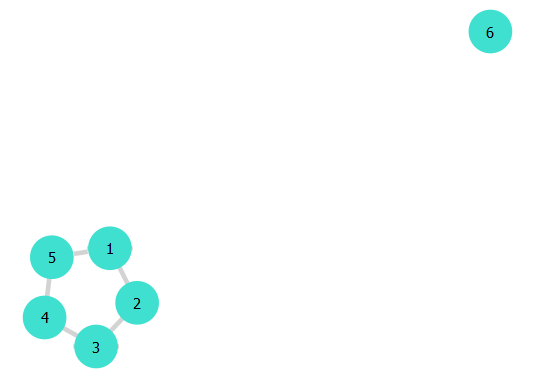

In [31]:
add_vertex!(g) # добавить вершину
gplot(g, nodelabel= 1:nv(g))

## Распространенные графы

In [ ]:
Graphs.SimpleGraphs.SimpleDiGraph
Graphs.SimpleGraphs.SimpleGraph
Graphs.SimpleGraphs.SimpleGraph
Graphs.SimpleGraphs.SimpleGraph
Graphs.SimpleGraphs.StochasticBlockModel
Graphs.SimpleGraphs.barabasi_albert
Graphs.SimpleGraphs.barabasi_albert
Graphs.SimpleGraphs.barabasi_albert!
Graphs.SimpleGraphs.barbell_graph
Graphs.SimpleGraphs.binary_tree
Graphs.SimpleGraphs.blockcounts
Graphs.SimpleGraphs.circular_ladder_graph
Graphs.SimpleGraphs.clique_graph
Graphs.SimpleGraphs.complete_bipartite_graph
Graphs.SimpleGraphs.complete_digraph
Graphs.SimpleGraphs.complete_graph
Graphs.SimpleGraphs.complete_multipartite_graph
Graphs.SimpleGraphs.cycle_digraph
Graphs.SimpleGraphs.cycle_graph
Graphs.SimpleGraphs.dorogovtsev_mendes
Graphs.SimpleGraphs.double_binary_tree
Graphs.SimpleGraphs.erdos_renyi
Graphs.SimpleGraphs.erdos_renyi
Graphs.SimpleGraphs.euclidean_graph
Graphs.SimpleGraphs.euclidean_graph
Graphs.SimpleGraphs.expected_degree_graph
Graphs.SimpleGraphs.grid
Graphs.SimpleGraphs.kronecker
Graphs.SimpleGraphs.ladder_graph
Graphs.SimpleGraphs.lollipop_graph
Graphs.SimpleGraphs.make_edgestream
Graphs.SimpleGraphs.nearbipartiteaffinity
Graphs.SimpleGraphs.newman_watts_strogatz
Graphs.SimpleGraphs.path_digraph
Graphs.SimpleGraphs.path_graph
Graphs.SimpleGraphs.randbn
Graphs.SimpleGraphs.random_configuration_model
Graphs.SimpleGraphs.random_orientation_dag
Graphs.SimpleGraphs.random_pair
Graphs.SimpleGraphs.random_regular_digraph
Graphs.SimpleGraphs.random_regular_graph
Graphs.SimpleGraphs.random_tournament_digraph
Graphs.SimpleGraphs.roach_graph
Graphs.SimpleGraphs.sbmaffinity
Graphs.SimpleGraphs.smallgraph
Graphs.SimpleGraphs.star_digraph
Graphs.SimpleGraphs.star_graph
Graphs.SimpleGraphs.static_fitness_model
Graphs.SimpleGraphs.static_fitness_model
Graphs.SimpleGraphs.static_scale_free
Graphs.SimpleGraphs.static_scale_free
Graphs.SimpleGraphs.stochastic_block_model
Graphs.SimpleGraphs.stochastic_block_model
Graphs.SimpleGraphs.turan_graph
Graphs.SimpleGraphs.uniform_tree
Graphs.SimpleGraphs.watts_strogatz
Graphs.SimpleGraphs.wheel_digraph
Graphs.SimpleGraphs.wheel_graph

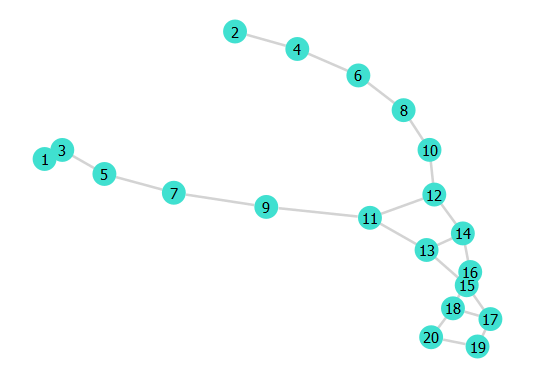

In [51]:
 g = roach_graph(5)
# g = wheel_graph(10)
# g = star_graph(10)
# g = binary_tree(5)
# g = double_binary_tree(5)
# g = lollipop_graph(5, 10)


gplot(g, nodelabel= 1:nv(g))

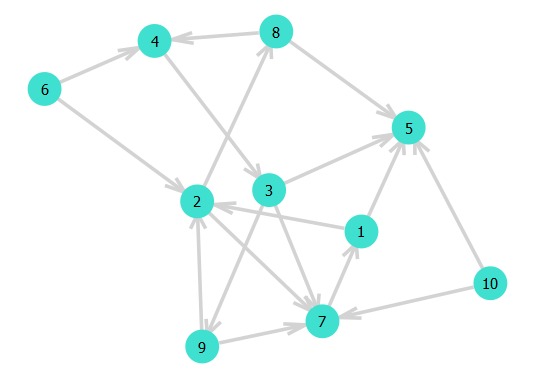

In [54]:
g = DiGraph(10,17)
gplot(g, nodelabel= 1:nv(g))

| `s`                       | graph type                       |
|:------------------------|:---------------------------------|
| :bull                       | A [bull graph](https://en.wikipedia.org/wiki/Bull_graph).  |
| :chvatal                    | A [Chvátal graph](https://en.wikipedia.org/wiki/Chvátal_graph). |
| :cubical                    | A [Platonic cubical graph](https://en.wikipedia.org/wiki/Platonic_graph). |
| :desargues                |   A [Desarguesgraph](https://en.wikipedia.org/wiki/Desargues_graph).|
| :diamond                  |   A [diamond graph](http://en.wikipedia.org/wiki/Diamond_graph). |
| :dodecahedral             |   A [Platonic dodecahedral  graph](https://en.wikipedia.org/wiki/Platonic_graph). |
| :frucht                   |   A [Frucht graph](https://en.wikipedia.org/wiki/Frucht_graph). |
| :heawood                  |   A [Heawood graph](https://en.wikipedia.org/wiki/Heawood_graph). |
| :house                    |   A graph mimicing the classic outline of a house. |
| :housex                   |   A house graph, with two edges crossing the bottom square. |
| :icosahedral              |   A [Platonic icosahedral   graph](https://en.wikipedia.org/wiki/Platonic_graph). |
| :karate                   |   A social network graph called [Zachary's karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). |
| :krackhardtkite           |   A [Krackhardt-Kite social network  graph](http://mathworld.wolfram.com/KrackhardtKite.html). |
| :moebiuskantor            |   A [Möbius-Kantor graph](http://en.wikipedia.org/wiki/Möbius–Kantor_graph). |
| :octahedral               |   A [Platonic octahedral graph](https://en.wikipedia.org/wiki/Platonic_graph).
| :pappus                   |   A [Pappus graph](http://en.wikipedia.org/wiki/Pappus_graph). |
| :petersen                 |   A [Petersen graph](http://en.wikipedia.org/wiki/Petersen_graph). |
| :sedgewickmaze            |   A simple maze graph used in Sedgewick's *Algorithms in C++: Graph  Algorithms (3rd ed.)* |
| :tetrahedral              |   A [Platonic tetrahedral  graph](https://en.wikipedia.org/wiki/Platonic_graph). |
| :truncatedcube            |   A skeleton of the [truncated cube graph](https://en.wikipedia.org/wiki/Truncated_cube). |
| :truncatedtetrahedron     |   A skeleton of the [truncated tetrahedron  graph](https://en.wikipedia.org/wiki/Truncated_tetrahedron). |
| :truncatedtetrahedron_dir |   A skeleton of the [truncated tetrahedron digraph](https://en.wikipedia.org/wiki/Truncated_tetrahedron). |
| :tutte                    |   A [Tutte graph](https://en.wikipedia.org/wiki/Tutte_graph). |

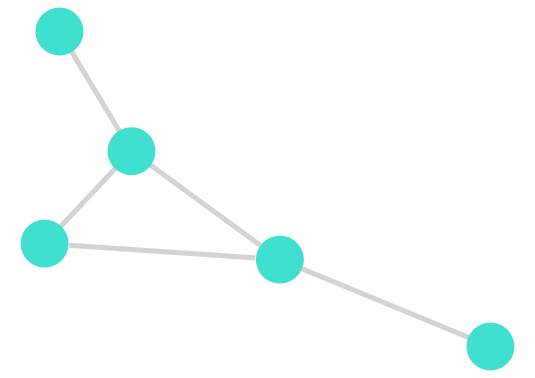

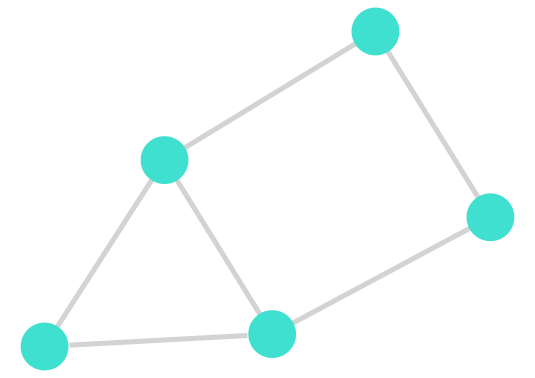

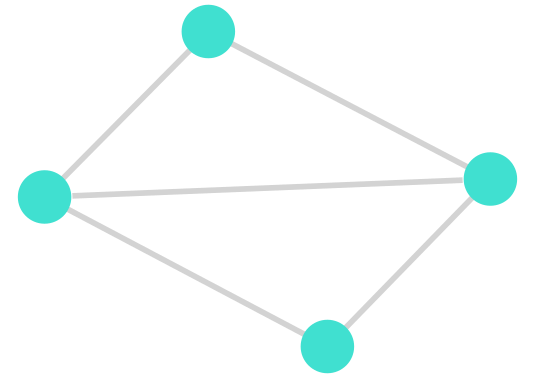

In [58]:
for shape in ["bull","house","diamond"]
    G = smallgraph(shape)
    display(gplot(G))
end

## Матрицы графов

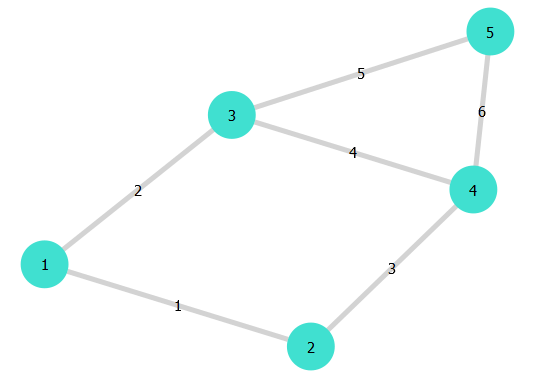

In [59]:
G = smallgraph("house")

nvertices = nv(G) # number of vertices
nedges = ne(G)    # number of edges

gplot(G, nodelabel=1:nvertices, edgelabel=1:nedges)

In [60]:
adjacency_matrix(G) # матрица смежности

5×5 SparseArrays.SparseMatrixCSC{Int64, Int64} with 12 stored entries:
 ⋅  1  1  ⋅  ⋅
 1  ⋅  ⋅  1  ⋅
 1  ⋅  ⋅  1  1
 ⋅  1  1  ⋅  1
 ⋅  ⋅  1  1  ⋅

In [61]:
incidence_matrix(G) # матрица инцидентности

5×6 SparseArrays.SparseMatrixCSC{Int64, Int64} with 12 stored entries:
 1  1  ⋅  ⋅  ⋅  ⋅
 1  ⋅  1  ⋅  ⋅  ⋅
 ⋅  1  ⋅  1  1  ⋅
 ⋅  ⋅  1  1  ⋅  1
 ⋅  ⋅  ⋅  ⋅  1  1

In [62]:
laplacian_matrix(G) # Матрица Кирхгофа (Лапласа)

5×5 SparseArrays.SparseMatrixCSC{Int64, Int64} with 17 stored entries:
  2  -1  -1   ⋅   ⋅
 -1   2   ⋅  -1   ⋅
 -1   ⋅   3  -1  -1
  ⋅  -1  -1   3  -1
  ⋅   ⋅  -1  -1   2

## Некоторые возможности пакета GraphPlot.jl

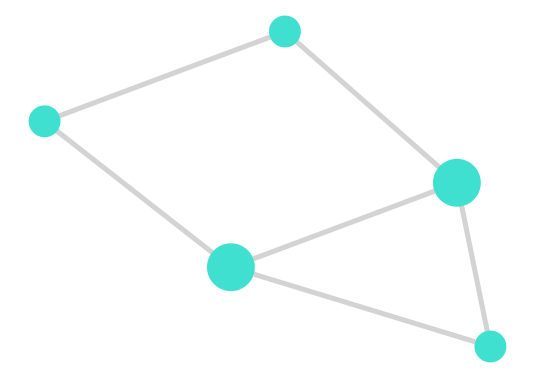

In [63]:
nodesize = degree(G)
gplot(G, nodesize=nodesize) # изменение размера вершин

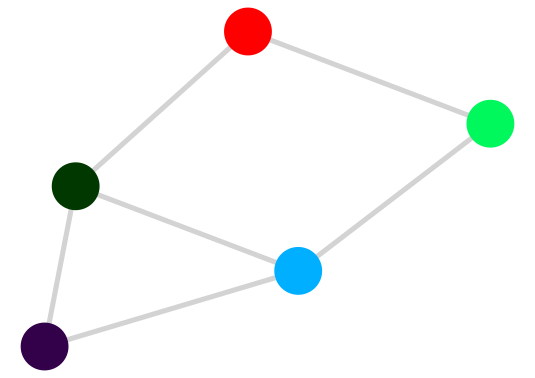

In [65]:
nodefillc = distinguishable_colors(nv(G), colorant"red")
gplot(G, nodefillc=nodefillc) # изменение цвета вершин

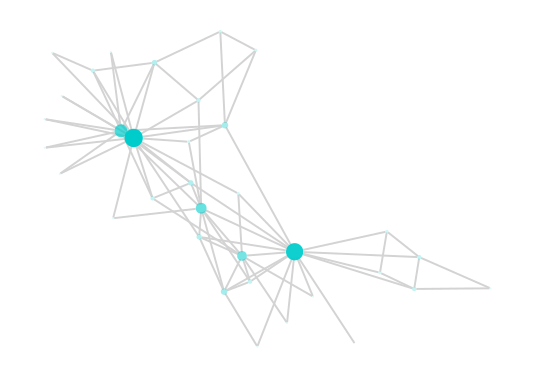

In [66]:
g = smallgraph(:karate)
nodesize = [Graphs.outdegree(g, v) for v in Graphs.vertices(g)]
gplot(g, nodesize=nodesize)
alphas = nodesize/maximum(nodesize)
nodefillc = [RGBA(0.0,0.8,0.8,i) for i in alphas]
gplot(g, nodefillc=nodefillc, nodesize=nodesize) # изменение прозрачности вершин

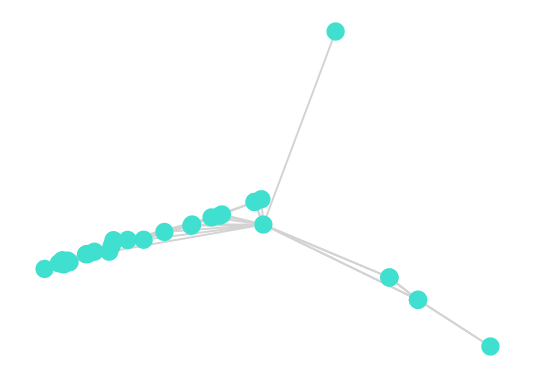

In [88]:
# Алгоритмы компановки графа
G = smallgraph(:karate)
#gplot(G)
#gplot(G, layout=random_layout)
#gplot(G, layout=circular_layout)
gplot(G, layout=spectral_layout)

## Пример изучения сетевой структуры данных - пассажиропотоков
Набор данных сервиса по продаже билетов Туту.ру о путешествиях по стране создан для прогнозирования распространения коронавирусной инфекции COVID-19. Он содержит информацию о количестве перемещений между городами на самолетах, поездах и автобусах в апреле 2019 г. Число пассажиров не ограничивается количеством проданных через сервис Туту.ру билетов, а восстановлено до 100%. По сообщениям разработчиков набора данных, автобусы – самая неточная часть набора ввиду наличия «серых»
перевозчиков. Для арктических поселений там содержится всего 11 маршрутов (в основном из Архангельска и Петрозаводска). Поэтому в данном исследовании ограничимся данными о самолетах (558 маршрутов) и поездах (712 маршрутов). Авиа- и железнодорожные данные тоже имеют ограничения. В восточной части страны покрытие рынка хуже. Это касается, в частности, вертолетных маршрутов между городами Дальнего Востока и винтомоторной авиация Якутии. 
https://story.tutu.ru/dataset-tutu-ru-i-dannye-modeliopen-data-science/


In [89]:
tranportflows = DataFrame(CSV.File("transport.csv"))

Row,transport,departure,arrival,passengers
,String7,String,String,Int64
1,avia,Москва,Симферополь,159441
2,avia,Москва,Сочи,149299
3,avia,Симферополь,Москва,155822
4,avia,Сочи,Москва,143298
5,avia,Санкт-Петербург,Москва,135749
6,avia,Москва,Санкт-Петербург,121759
7,avia,Краснодар,Москва,124511
8,avia,Москва,Краснодар,111782
9,avia,Минеральные Воды,Москва,101584


In [90]:
cities = DataFrame(CSV.File("cities.csv"))

arcticcities = ["Архангельск", "Северодвинск", "Беломорск", "Кемь", "Костомукша", "Сегежа",
    "Воркута", "Инта", "Усинск", "Игарка", "Норильск", "Апатиты", "Кандалакша", "Кола", "Мурманск",
    "Оленегорск", "Полярные Зори", "Нарьян-Мар", "Анадырь", "Певек", "Среднеколымск", "Губкинский",
    "Лабытнанги", "Надым", "Новый Уренгой", "Ноябрьск", "Салехард", "Хатанга", "Диксон"]

northcities =["Тында", "Вельск", "Коряжма", "Котлас", "Мирный", "Няндома", "Онега", "Северобайкальск",
    "Бодайбо", "Братск", "Киренск", "Усть-Илимск", "Усть-Кут", "Петропавловск-Камчатский", "Кондопога",
    "Лахденпохья", "Медвежьегорск", "Олонец", "Петрозаводск", "Питкяранта", "Пудож", "Сортавала", 
    "Суоярви", "Вуктыл", "Емва", "Микунь", "Печора", "Сосногорск", "Сыктывкар", "Ухта", "Кодинск", 
    "Лесосибирск", "Магадан", "Сусуман", "Дальнегорск", "Долинск", "Курильск", "Макаров", "Оха", 
    "Поронайск", "Южно-Сахалинск", "Колпашево", "Стрежевой", "Кызыл", "Туран", "Комсомольск-на-Амуре",
    "Николаевск-на-Амуре", "Советская Гавань", "Белоярский", "Когалым", "Лангепас", "Мегион", 
    "Нефтеюганск", "Нижневартовск", "Нягань", "Покачи", "Пыть-Ях", "Радужный", "Советский", "Сургут", 
    "Урай", "Ханты-Мансийск", "Югорск", "Алдан", "Вилюйск", "Ленск", "Мирный", "Нерюнгри", "Нюрба", 
    "Олёкминск", "Томмот", "Удачный", "Якутск"]

arctic_avia_flows = filter(r -> (r.departure in arcticcities || r.arrival in arcticcities) && r.transport == "avia", tranportflows)
arctic_train_flows = filter(r -> (r.departure in arcticcities || r.arrival in arcticcities) && r.transport == "train", tranportflows)

Row,transport,departure,arrival,passengers
,String7,String,String,Int64
1,train,Архангельск,Москва,8310
2,train,Москва,Архангельск,8224
3,train,Мурманск,Санкт-Петербург,7197
4,train,Новый Уренгой,Тюмень,7192
5,train,Усинск,Сыктывкар,5778
6,train,Санкт-Петербург,Мурманск,5650
7,train,Тюмень,Новый Уренгой,5525
8,train,Санкт-Петербург,Апатиты,5251
9,train,Апатиты,Санкт-Петербург,4964


In [93]:
arctic_avia_nodenumbers = unique(vcat(arctic_avia_flows[!, 2], arctic_avia_flows[!, 3]))
arctic_avia_nodenumbers_dict = Dict(arctic_avia_nodenumbers[x] => x for x in 1:length(arctic_avia_nodenumbers))

arctic_avia_flows.dnum = [arctic_avia_nodenumbers_dict[x] for x in arctic_avia_flows.departure]
arctic_avia_flows.anum = [arctic_avia_nodenumbers_dict[x] for x in arctic_avia_flows.arrival]
arctic_avia_flows

G_avia_julia = SimpleDiGraph(length(arctic_avia_nodenumbers))
for r in eachrow(arctic_avia_flows)
    add_edge!(G_avia_julia, r.dnum, r.anum)
end

G_avia_julia

{85, 558} directed simple Int64 graph

In [94]:
arctic_train_nodenumbers = unique(vcat(arctic_train_flows[!, 2], arctic_train_flows[!, 3]))
arctic_train_nodenumbers_dict = Dict(arctic_train_nodenumbers[x] => x for x in 1:length(arctic_train_nodenumbers))

arctic_train_flows.dnum = [arctic_train_nodenumbers_dict[x] for x in arctic_train_flows.departure]
arctic_train_flows.anum = [arctic_train_nodenumbers_dict[x] for x in arctic_train_flows.arrival]
arctic_train_flows

G_train_julia = SimpleDiGraph(length(arctic_train_nodenumbers))
for r in eachrow(arctic_train_flows)
    add_edge!(G_train_julia, r.dnum, r.anum)
end

G_train_julia

{160, 712} directed simple Int64 graph

In [134]:
py"""
import networkx as nx
"""

In [95]:
nx = pyimport("networkx")

PyObject <module 'networkx' from 'C:\\Users\\Ghost\\.julia\\conda\\3\\lib\\site-packages\\networkx\\__init__.py'>

In [96]:
G_avia_py = nx.DiGraph()
for r in eachrow(arctic_avia_flows)
    G_avia_py.add_edge(r.departure, r.arrival, weight=r.passengers)
end

G_train_py = nx.DiGraph()
for r in eachrow(arctic_train_flows)
    G_train_py.add_edge(r.departure, r.arrival, weight=r.passengers)
end

#G_py = nx.DiGraph()
#G_py.add_edges_from(map(i -> (i.src, i.dst), collect(edges(g))))
#nx.density(G_py)

## Характеристики сетей

### Число узлов - размер сети

In [97]:
nv(G_avia_julia) # Число узлов - размер сети

85

In [98]:
nv(G_train_julia) # Число узлов - размер сети

160

In [100]:
nv(G_avia_julia) == G_avia_py.number_of_nodes() 

true

### Число ребер (связей)

In [101]:
ne(G_avia_julia) 

558

In [102]:
ne(G_train_julia) 

712

In [103]:
ne(G_train_julia) == G_train_py.number_of_edges()

true

### Плотность сети
Показатель плотности сети измеряется в промежутке от 0 до 1 и оценивает долю имеющихся в сети связей от максимально возможной — когда каждый узел соединен с каждым. Сети с низкой плотностью называют
разреженными.

In [104]:
density(G_avia_julia)

0.07815126050420168

In [105]:
density(G_train_julia)

0.0279874213836478

In [106]:
ne(G_avia_julia) / (nv(G_avia_julia) * (nv(G_avia_julia) - 1))

0.07815126050420168

In [107]:
density(G_avia_julia) == nx.density(G_avia_py)

true

### Взаимность связей сети

In [108]:
(ne(G_avia_julia) - ne(SimpleGraph(G_avia_julia))) * 2 / ne(G_avia_julia)

0.8279569892473119

In [109]:
(ne(G_train_julia) - ne(SimpleGraph(G_train_julia))) * 2 / ne(G_train_julia)

0.7752808988764045

In [110]:
(ne(G_avia_julia) - ne(SimpleGraph(G_avia_julia))) * 2 / ne(G_avia_julia) == nx.overall_reciprocity(G_avia_py)

true

### Связность
Выделяют классы сильно связных и слабо связных сетей. В сильно связных сетях существует по меньшей мере один направленный путь между каждой парой узлов в обоих направлениях. Если связность достигается без учета направлений связей, то сеть называется слабо связной.

In [111]:
nx.is_strongly_connected(G_avia_py) # является ли сильно связной

false

In [112]:
nx.is_strongly_connected(G_train_py)

false

In [113]:
nx.is_weakly_connected(G_avia_py) # является ли слабо связной

true

In [114]:
nx.is_strongly_connected(G_train_py)

false

### Cредний вес связи

In [115]:
mean(arctic_avia_flows.passengers)

978.1200716845879

In [116]:
mean(arctic_train_flows.passengers)

384.2429775280899

### Средняя степень сети
Средняя степень отражает среднее по всей сети число связей или соседей.

In [117]:
ne(G_avia_julia) / nv(G_avia_julia) * 2

13.129411764705882

In [118]:
ne(G_train_julia) / nv(G_train_julia) * 2

8.9

In [119]:
py""" 
def average_degree(G):
    degree_values = [v for k, v in G.degree()] 
    return sum(degree_values) / len(degree_values)
"""
py"average_degree"(G_avia_py) == ne(G_avia_julia) / nv(G_avia_julia) * 2

true

### Средняя сила сети
Средняя взвешенная степень

In [120]:
ne(G_avia_julia) / nv(G_avia_julia) * 2 * mean(arctic_avia_flows.passengers)

12842.141176470588

In [121]:
ne(G_train_julia) / nv(G_train_julia) * 2 * mean(arctic_train_flows.passengers)

3419.7625000000003

In [122]:
py""" 
def average_weighted_degree(G):
    degree_values = [v for k, v in G.degree(weight='weight')] 
    return sum(degree_values) / len(degree_values)
"""
py"average_weighted_degree"(G_avia_py) == ne(G_avia_julia) / nv(G_avia_julia) * 2 * mean(arctic_avia_flows.passengers)

true

### Средняя длина пути
Кратчайший путь — это минимальное число связей, которое необходимо пройти по пути, соединяющему два узла. Средняя длина пути рассчитывается путем усреднения длин кратчайших путей по всем парам узлов.

In [123]:
nx.average_shortest_path_length(G_avia_py) 

1.9252100840336135

In [124]:
nx.average_shortest_path_length(G_train_py) 

2.4890723270440254

### Диаметр сети
Диаметр сети — максимальная длина кратчайшего пути между всеми парами узлов, т. е. длина самого длинного кратчайшего пути в сети.

In [125]:
nx.diameter(G_avia_py.to_undirected()) 

5

In [126]:
nx.diameter(G_train_py.to_undirected()) 

6

### Параметр гетерогенности
Параметр гетерогенности отражает изменчивость степени по всем узлам. Чем больше в сети хабов (узлов с более высокой степенью), тем выше
параметр гетерогенности.

In [127]:
py""" 
def heterogeneity(G):
    degree_values = [v for k, v in G.degree()]
    return (sum([x**2 for x in degree_values]) / len([x**2 for x in degree_values])) / ((sum(degree_values) / len(degree_values)) ** 2 )
"""
py"heterogeneity"(G_avia_py)

3.1577028815148833

In [128]:
py"heterogeneity"(G_train_py)

3.934004544880697

### Коэффициент степенной ассортативности
Коэффициент степенной ассортативности выше 0 тогда, когда высокостепенные узлы, как правило, соединены с другими высокостепенными узлами, а низкостепенные — с низкостепенными. (т. е. узлы тяготеют к подобным себе).

In [129]:
nx.degree_assortativity_coefficient(G_avia_py)

-0.6348484622453889

In [130]:
nx.degree_assortativity_coefficient(G_train_py)

-0.6435432373400108

### Коэффициент кластеризации 
Коэффициент кластеризации узла — доля пар его соседей, соединенных друг с другом. Усредняя коэффициент кластеризации по всем узлам, можно рассчитать коэффициент кластеризации сети

In [131]:
nx.average_clustering(G_avia_py)

0.30155952326624225

In [132]:
nx.average_clustering(G_train_py)

0.3975294599181034

## Выделение кластеров

In [ ]:
# Максимизация модулярности
# nx.community.greedy_modularity_communities(G_train_py, weight="weight") 

In [135]:
# Метод распространения меток. Основан на идее о том, 
# что связанные узлы обычно принадлежат одному и тому же кластеру. 
py""" 
def lpa_com(G):
    communities = nx.community.asyn_lpa_communities(G, weight="weight")
    return {frozenset(c) for c in communities}
"""

py"lpa_com"(G_train_py)

PyObject {frozenset({'Новосибирск', 'Тюмень', 'Ковров', 'Ноябрьск', 'Пыть-Ях', 'Екатеринбург', 'Губкинский', 'Карталы', 'Верещагино', 'Омск', 'Сургут', 'Пермь', 'Чернушка', 'Ишим', 'Кувандык', 'Камышлов', 'Казань', 'Челябинск', 'Новый Уренгой', 'Тобольск', 'Медногорск', 'Янаул', 'Талица', 'Когалым', 'Сарапул', 'Орск', 'Называевск', 'Кунгур', 'Кушва', 'Ижевск', 'Владимир', 'Аша', 'Невьянск', 'Богданович', 'Златоуст', 'Барабинск', 'Оренбург', 'Красноуфимск', 'Урень', 'Миасс', 'Кыштым', 'Агрыз', 'Троицк', 'Татарск', 'Первоуральск', 'Можга', 'Камбарка', 'Шахунья', 'Уфа'}), frozenset({'Сольцы'}), frozenset({'Костомукша', 'Бологое', 'Санкт-Петербург', 'Тула', 'Волхов', 'Белгород', 'Новосокольники', 'Вышний Волочёк', 'Апатиты', 'Орёл', 'Лахденпохья', 'Мурманск', 'Суоярви', 'Кола', 'Медвежьегорск', 'Курск', 'Кондопога', 'Тверь', 'Сегежа', 'Онега', 'Полярные Зори', 'Оленегорск', 'Беломорск', 'Кемь', 'Петрозаводск', 'Псков', 'Бежаницы', 'Порхов', 'Сортавала', 'Невель', 'Кандалакша', 'Новгород Ве

### Визуализация графа

In [145]:
nodenumbers = arctic_train_nodenumbers
arflows = arctic_train_flows
g = G_train_julia

#nodenumbers = arctic_avia_nodenumbers
#arflows = arctic_avia_flows
#g = G_avia_julia

nodenumbers2 = Dict(nodenumbers[x] => x for x in 1:length(nodenumbers))
P_dict = Dict(cities.name .=> cities.population)
PopDict = Dict(nodenumbers2[x] => P_dict[x] for x in nodenumbers)

transp_centres = DataFrame(node = nodenumbers)
transp_centres.num = 1:length(nodenumbers)
transp_centres.outnumb = [0 for x in transp_centres.node]
transp_centres.outpop = [0 for x in transp_centres.node]
transp_centres.innumb = [0 for x in transp_centres.node]
transp_centres.inpop = [0 for x in transp_centres.node]
transp_centres.inout = [0 for x in transp_centres.node]
 
for r in eachrow(arflows) 
     transp_centres.outnumb[nodenumbers2[r[:departure]]] += 1
     transp_centres.outpop[nodenumbers2[r[:departure]]] += r[:passengers]
     transp_centres.innumb[nodenumbers2[r[:arrival]]] += 1
     transp_centres.inpop[nodenumbers2[r[:arrival]]] += r[:passengers]
    
     transp_centres.inout[nodenumbers2[r[:departure]]] += r[:passengers]
     transp_centres.inout[nodenumbers2[r[:arrival]]] += r[:passengers]
end

sort(transp_centres, :inout, rev = true)

sum(transp_centres.outpop)
sum(transp_centres.inpop)
sum(transp_centres.outnumb)


transp_centres


Row,node,num,outnumb,outpop,innumb,inpop,inout
,String,Int64,Int64,Int64,Int64,Int64,Int64
1,Архангельск,1,38,22898,35,22156,45054
2,Москва,2,18,21960,18,23280,45240
3,Мурманск,3,33,20642,28,14747,35389
4,Новый Уренгой,4,56,29643,49,23982,53625
5,Усинск,5,29,17022,22,14798,31820
6,Санкт-Петербург,6,15,22047,15,21630,43677
7,Тюмень,7,3,10581,3,12987,23568
8,Апатиты,8,25,10604,22,9922,20526
9,Сыктывкар,9,3,4771,3,6081,10852


In [146]:
nodesize = .√.√.√map(x -> PopDict[x], 1:length(nodenumbers))
nodelabelsize = .√.√.√transp_centres.inout
nodelabel = copy(nodenumbers)
for i in 1:length(nodenumbers)
    if nodelabelsize[i] < 3.0
        nodelabel[i] = ""
    end
end

nodefillc = RGBA[]
for r in 1:length(nodenumbers)
    if nodenumbers[r] in arcticcities
        push!(nodefillc, RGBA(0.25, 0.38, 0.73, 0.85))
    elseif nodenumbers[r] in northcities
        push!(nodefillc, RGBA(0.25, 0.73, 0.38, 0.85))
    else
        push!(nodefillc, RGBA(0.95, 0.25, 0.25, 0.85))
    end
end

edgelinewidth = []
for e in edges(g)
    push!(edgelinewidth, .√filter(r -> r.dnum == src(e) && r.anum == dst(e), arflows)[!, 4]...)
end


mmm = maximum(.√.√.√arflows.passengers)
eeee = 0.
edgestrokecc = RGBA[]
for e in edges(g)
    eeee = (.√.√.√filter(r -> r.dnum == src(e) && r.anum == dst(e), arflows)[!, 4]...) / mmm
    push!(edgestrokecc,  RGBA((1-eeee)*0.15+0.25, (1-eeee)*0.15+0.25, (1-eeee)*0.15+0.25, 0.75))
end
nodelabel
edgestrokecc
edgelinewidth
nodefillc

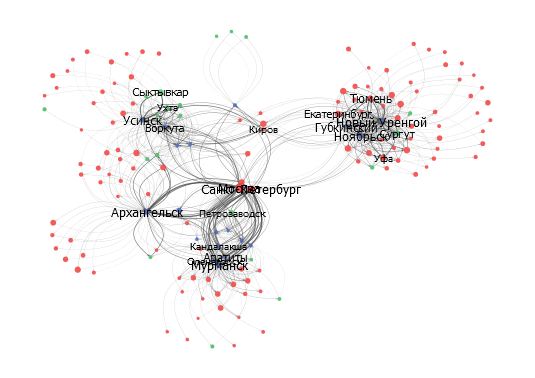

In [147]:
# Пример визуализации сети
layout = (args...) -> spring_layout(args...;
                                    C = 3.2, #3.2
                                    MAXITER = 1500,
                                    INITTEMP = 4.0)

migrplot = gplot(g, linetype="curve",
                nodelabel = nodelabel, 
                 nodelabelsize = nodelabelsize,
                 nodesize = nodesize, NODESIZE = 0.020,
                 NODELABELSIZE = 3.5,
                 edgestrokec = edgestrokecc, 
                 nodefillc = nodefillc, 
                 nodestrokec = RGB(0.35, 0.35, 0.45), 
                 nodestrokelw = 0.0,
                 edgelinewidth = edgelinewidth, EDGELINEWIDTH = 0.35,
                 arrowlengthfrac = 0.01,
                 arrowangleoffset = 15.0/180.0*π,
                 layout = layout
           #     layout = random_layout
           #     layout = circular_layout
           #     layout = stressmajorize_layout
            )
    
Compose.draw(SVG("graph.svg", 20cm, 20cm), migrplot) # 17 12
migrplot

См. также:
* Смирнов А.В. Цифровые следы населения как источник данных о миграционных потоках в российской Арктике // Демографическое обозрение. – 2022. – Том 9. № 2. – С 42-64. – DOI: 10.17323/demreview.v9i2.16205. – EDN: EBXAEU. – URL: http://www.avsci.ru/p/1_25.pdf
* http://arcdem.ru/